# Sentiment classification on Movie review

#### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import gensim
import os
import string
import re

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.shape

(50000, 2)

####  we will be using the first 10,000 review  only 

In [6]:
df = df[:10000]

In [7]:
df.shape

(10000, 2)

#### Distribution 

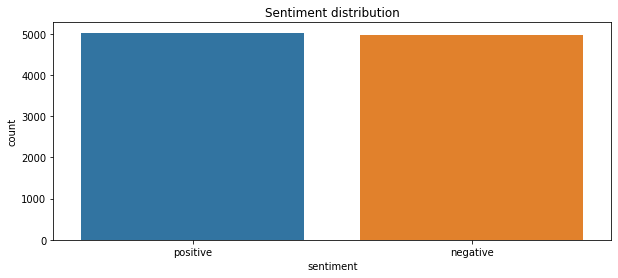

In [8]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment distribution")
plt.show()

In [9]:
# Print target distribution 
df["sentiment"].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Preprocessing the text 

In [11]:
print(df["review"][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

##### Let's clean the data by removing html tags, which can be done by using the BeautifulSoup library. We'll also remove urls and special characters

In [12]:
from bs4 import BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

def remove_urls(text):
    return re.sub("http\S+","",text)

def remove_special_characters(text):
    return re.sub("[^A-Za-z0-9 ]+","",text)

def clean_text2(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_special_characters(text)
    return text

In [13]:
df["review"]=df["review"].apply(clean_text2)

In [14]:
print(df["review"][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty picture

#### cleanning the text 

In [15]:
stopwords = stopwords.words("english")


In [16]:
positive= df[df["sentiment"]=="positive"]

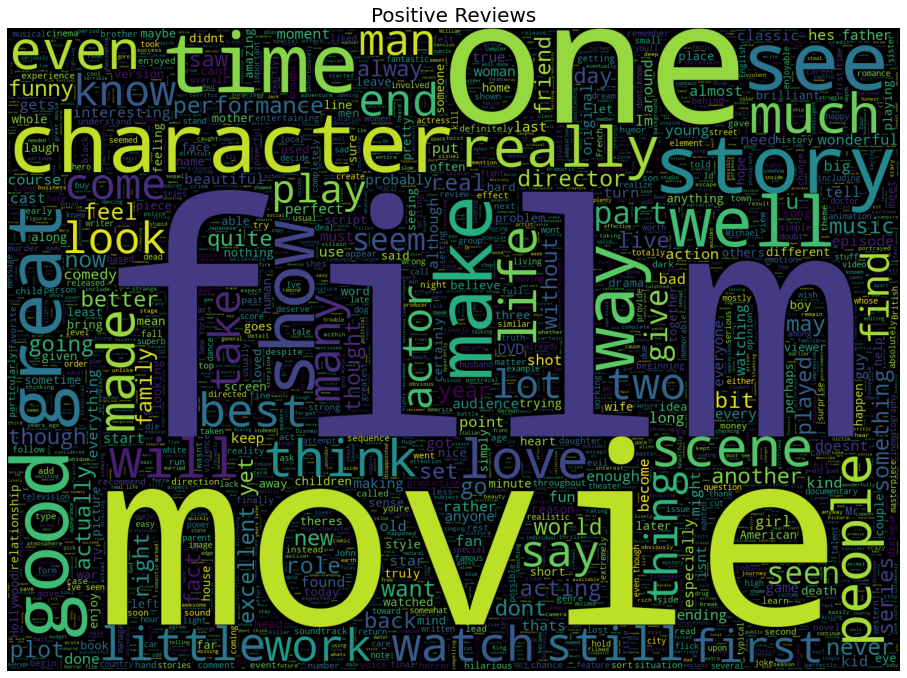

In [17]:
plt.subplots(figsize=(16,14))
worldcloud=WordCloud(
                        background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(positive.review))

plt.title("Positive Reviews", fontsize=20)
plt.imshow(worldcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [18]:
negative= df[df["sentiment"]=="negative"]

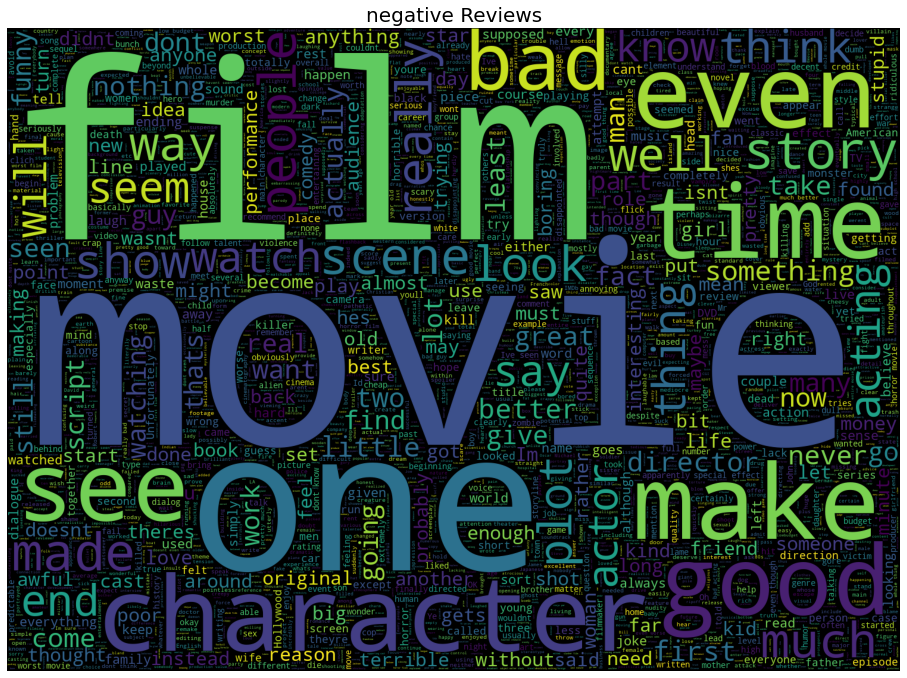

In [19]:
plt.subplots(figsize=(16,14))
worldcloud=WordCloud(
                        background_color='black',max_words = 10000,
                          width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(negative.review))

plt.title("negative Reviews", fontsize=20)
plt.imshow(worldcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [20]:
stopwords.remove("not")
stopwords.remove("no")

In [21]:
def clean_sent(text):
    
    ## splitting the sent into words
    words=word_tokenize(text)
    
    ## removing the punctuation from the words list 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    words=[re_punc.sub('',word) for word in words ]
    
    
    ## removing un-printable words from the word list
    re_unprintable = re.compile('[^%s]' % re.escape(string.printable))
    words = [re_unprintable.sub('', word) for word in words]
    
    ## removing non- alphabetic 
    words = [word for word in words if word.isalpha()]
    
    
    ## removing the word with only one  charater 
    words = [word for word in words if len(word)>1]
    
    
    ## lowering the case of all the words
    words = [word.lower()for word in words]
    
    
    ## removing the stopwords from the words 
    words = [word for word in words if word  not in set(stopwords)]
    
    ## stemming the words 
    
    words = [WordNetLemmatizer().lemmatize(word) for word in words]
    
    ## joining the words again to make a sentence
    
    return " ".join(words)
    
    

In [22]:
df.review = df.review.apply(clean_sent)

In [23]:
df.head()

review sentiment
0  one reviewer mentioned watching oz episode you...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically there family little boy jake think t...  negative
4  petter matteis love time money visually stunni...  positive

### checking out the clean data here  

In [24]:
print(df["review"][0])

one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate tur

#### ENCODE TARGET

In [25]:
df["sentiment"] = df["sentiment"].replace("positive",1).replace("negative",0)

In [26]:
df.head()

review  sentiment
0  one reviewer mentioned watching oz episode you...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically there family little boy jake think t...          0
4  petter matteis love time money visually stunni...          1

# Split The Data 

In [27]:
# Split features and labels
X = df["review"]
Y = df["sentiment"]

# Split train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Print train target distribution
print(Y_train.value_counts())

1    4007
0    3993
Name: sentiment, dtype: int64


### Model Building and vectorizer 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC

### countVectories

In [29]:
text_count = Pipeline([("countVect",CountVectorizer()),("clf",SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))])

In [30]:
text_count.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('countVect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
            

In [31]:
y_pred = text_count.predict(X_test)

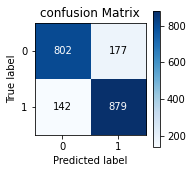

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       979
           1       0.83      0.86      0.85      1021

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy of the model:  0.8405


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred))

acc=accuracy_score(Y_test, y_pred)
print("Accuracy of the model: ",acc)

# TfidfVectorizer

In [33]:
text_tfid = Pipeline([("Tfid",TfidfVectorizer()),("clf",SVC(C=1.0, kernel='linear', degree=2, gamma='auto'))])

In [34]:
text_tfid.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('Tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [35]:
y_pred1 = text_tfid.predict(X_test)

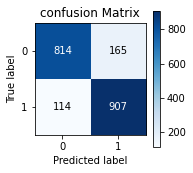

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       979
           1       0.85      0.89      0.87      1021

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy of the model:  0.8605


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import scikitplot as skplt

plt.rcParams['figure.figsize'] = (2.5, 2.5)
cfm=skplt.metrics.plot_confusion_matrix(Y_test,y_pred1)
plt.title("confusion Matrix")
plt.show()
#print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred1))

acc=accuracy_score(Y_test, y_pred1)
print("Accuracy of the model: ",acc)

### Predicting values 

In [37]:
from nltk.stem import PorterStemmer

In [38]:
def predict_sentence(review):
    
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if word  not in set(stopwords)]
    ps= PorterStemmer()
    final_review = [ps.stem(word) for word in review]
    final_review= " ". join(final_review)
    Tfid = TfidfVectorizer()
    temp=Tfid.fit_transform([final_review]).toarray()
    return text_tfid.predict(temp)

In [39]:
text_tfid.predict(["The Movie was as Good as we had Expected"])

array([1], dtype=int64)

In [40]:
text_tfid.predict(["the movie was so bad as we not expected it "])

array([0], dtype=int64)

# Word2vector

In [41]:
import gensim

In [42]:
import nltk
#import gensim

from gensim.models import Word2Vec

In [60]:
print(df["review"][0])

one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust not show faint hearted timid show pull no punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy not high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence not violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate tur

In [61]:
corpus=[]
for text in df["review"]:
    tokenized_sentence = word_tokenize(text)
    corpus.append(tokenized_sentence)

In [62]:
corpus

[['one',
  'reviewer',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'methe',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'not',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'no',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'not',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'moreso',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'n

In [63]:
model = Word2Vec(corpus, window = 5, min_count = 2,workers=4)

In [64]:
model.corpus_count

10000

In [70]:
words = model.wv.get_mean_vector


In [71]:
words

<bound method KeyedVectors.get_mean_vector of <gensim.models.keyedvectors.KeyedVectors object at 0x00000203D07A09C8>>

In [72]:
print(words)

<bound method KeyedVectors.get_mean_vector of <gensim.models.keyedvectors.KeyedVectors object at 0x00000203D07A09C8>>


In [73]:
# Most similar words
similar = model.wv.most_similar('exactly')

In [75]:
similar

[('personally', 0.9380983114242554),
 ('honest', 0.9262935519218445),
 ('anyway', 0.921028733253479),
 ('hey', 0.9202000498771667),
 ('suppose', 0.9174869060516357),
 ('sorry', 0.9130328893661499),
 ('okay', 0.9119865894317627),
 ('embarrassed', 0.9117918610572815),
 ('sad', 0.9103673100471497),
 ('easy', 0.908092200756073)]

In [77]:
# Get all the vectors
vectors = [model.wv.get_vector(token) for token in model.wv.index_to_key]

In [78]:
# Calculate the average vector
avg_vector = np.mean(vectors, axis=0)

In [79]:
avg_vector

array([-0.04945119,  0.11266831,  0.06730291, -0.01176116,  0.02017197,
       -0.14512785, -0.01109543,  0.18133318, -0.02158726, -0.08254137,
       -0.06518115, -0.13935135, -0.0253174 ,  0.03536217,  0.00043082,
       -0.05666315, -0.00565983, -0.10801324, -0.01096806, -0.170324  ,
        0.06359808,  0.04187085,  0.08014888, -0.07166594, -0.02406839,
        0.01454576, -0.04400403, -0.04064007, -0.0913792 ,  0.03908012,
        0.07198099,  0.0117866 , -0.00882667, -0.05017823,  0.00464792,
        0.05997313, -0.03433711, -0.03788809, -0.0407152 , -0.16458172,
        0.00625184, -0.03186214, -0.11521979,  0.0362667 ,  0.11043677,
       -0.06071971, -0.06503727, -0.00576783,  0.03551248,  0.05870353,
        0.02562007, -0.13028862, -0.03188004,  0.00096259, -0.07955788,
        0.08410073, -0.01937352, -0.06912077, -0.10049874,  0.03409759,
        0.03022613,  0.07261108, -0.04655047,  0.03010337, -0.04707646,
        0.07696552,  0.02901094,  0.02367565, -0.07209022,  0.10

### Insights dervie from the movie review

we're visualizing the most common words in positive and negative reviews to gain insights into what aspects of movies are most important for reviewers. This can help us understand what makes a movie successful or unsuccessful, and can inform decisions about which types of movies to produce or invest in.

In [119]:
reviews = df[df['sentiment'] == 1]['review']

In [120]:
reviews

0       one reviewer mentioned watching oz episode you...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
4       petter matteis love time money visually stunni...
5       probably alltime favorite movie story selfless...
                              ...                        
9987    rainbow brite star stealer opinion excellent m...
9991    charleton heston wore one james franciscus wor...
9993    citizen kane hollywood executive turned cobweb...
9995    fun entertaining movie wwii german spy julie a...
9999    smashing film filmmaking show intense strange ...
Name: review, Length: 5028, dtype: object

In [121]:
words = [word_tokenize(review) for review in reviews]

In [122]:
words = [word for sublist in words for word in sublist]

In [123]:
word_freq = nltk.FreqDist(words)

In [124]:
word_freq

FreqDist({'film': 9277, 'movie': 8774, 'not': 5639, 'one': 5366, 'like': 3484, 'time': 2983, 'good': 2854, 'story': 2715, 'character': 2674, 'great': 2548, ...})

In [129]:
most_common = word_freq.most_common(20)

In [130]:
most_common



[('film', 9277),
 ('movie', 8774),
 ('not', 5639),
 ('one', 5366),
 ('like', 3484),
 ('time', 2983),
 ('good', 2854),
 ('story', 2715),
 ('character', 2674),
 ('great', 2548),
 ('see', 2481),
 ('get', 2229),
 ('well', 2229),
 ('make', 2144),
 ('would', 2126),
 ('really', 2077),
 ('also', 2026),
 ('show', 1963),
 ('scene', 1899),
 ('love', 1844)]

<AxesSubplot:title={'center':'Most common words in positive reviews'}>

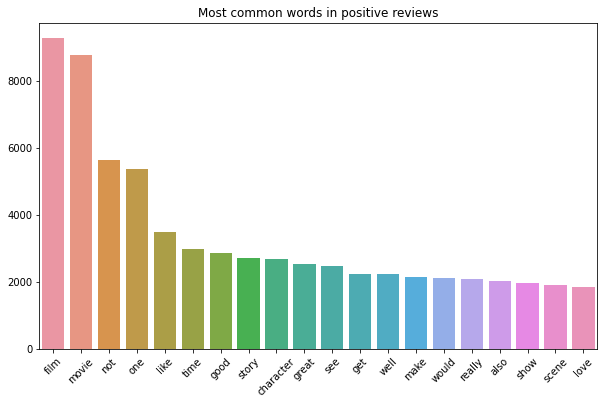

In [131]:
plt.figure(figsize=(10, 6))
plt.title(f"Most common words in positive reviews")
plt.xticks(rotation=45)
sns.barplot(x=[w[0] for w in most_common], y=[w[1] for w in most_common])

<AxesSubplot:title={'center':'Most common words in negative reviews'}>

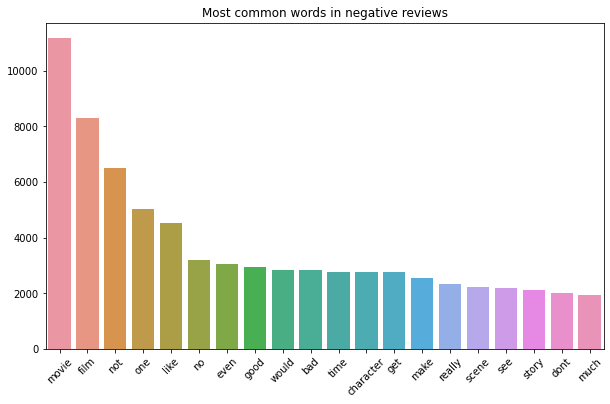

In [132]:
negative = df[df['sentiment'] == 0]['review']

words = [word_tokenize(review) for review in negative]

words = [word for sublist in words for word in sublist]

word_freq = nltk.FreqDist(words)

most_common_neg = word_freq.most_common(20)

plt.figure(figsize=(10, 6))
plt.title(f"Most common words in negative reviews")
plt.xticks(rotation=45)
sns.barplot(x=[w[0] for w in most_common_neg], y=[w[1] for w in most_common_neg])

In [133]:
# most common  negative words 
most_common_neg

[('movie', 11168),
 ('film', 8309),
 ('not', 6516),
 ('one', 5036),
 ('like', 4516),
 ('no', 3200),
 ('even', 3064),
 ('good', 2937),
 ('would', 2844),
 ('bad', 2831),
 ('time', 2777),
 ('character', 2764),
 ('get', 2761),
 ('make', 2554),
 ('really', 2342),
 ('scene', 2229),
 ('see', 2177),
 ('story', 2108),
 ('dont', 1993),
 ('much', 1939)]

In [139]:
# Step 3: Tokenize the text data
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(df["review"])

# Step 4: Calculate word frequencies
feature_names = vectorizer.get_feature_names()
doc_term_matrix = vectorized_data.toarray()

#### import Keywords 

In [140]:
word_freq = []
for i in range(len(doc_term_matrix)):
    freq = {}
    for j in range(len(feature_names)):
        if doc_term_matrix[i][j] > 0:
            freq[feature_names[j]] = doc_term_matrix[i][j]
    word_freq.append(freq)

# Step 5: Identify important keywords
for i in range(len(word_freq)):
    sorted_words = sorted(word_freq[i].items(), key=lambda x: x[1], reverse=True)
    print(f"Top keywords in document {i+1}:")
    for word, score in sorted_words[:3]:
        print(f"{word} (TF-IDF score: {score:.2f})")
    print("\n")

Top keywords in document 1:
oz (TF-IDF score: 0.39)
violence (TF-IDF score: 0.21)
prison (TF-IDF score: 0.19)


Top keywords in document 2:
realism (TF-IDF score: 0.22)
technique (TF-IDF score: 0.22)
halliwell (TF-IDF score: 0.18)


Top keywords in document 3:
comedy (TF-IDF score: 0.20)
johanson (TF-IDF score: 0.19)
prada (TF-IDF score: 0.19)


Top keywords in document 4:
jake (TF-IDF score: 0.57)
parent (TF-IDF score: 0.27)
closet (TF-IDF score: 0.26)


Top keywords in document 5:
matteis (TF-IDF score: 0.28)
mattei (TF-IDF score: 0.25)
mr (TF-IDF score: 0.19)


Top keywords in document 6:
dressedup (TF-IDF score: 0.25)
selflessness (TF-IDF score: 0.24)
dedication (TF-IDF score: 0.21)


Top keywords in document 7:
seahunt (TF-IDF score: 0.37)
sea (TF-IDF score: 0.21)
would (TF-IDF score: 0.20)


Top keywords in document 8:
show (TF-IDF score: 0.35)
air (TF-IDF score: 0.21)
guesthosts (TF-IDF score: 0.21)


Top keywords in document 9:
keitel (TF-IDF score: 0.44)
film (TF-IDF score: 0.

Top keywords in document 100:
mario (TF-IDF score: 0.69)
game (TF-IDF score: 0.28)
bowser (TF-IDF score: 0.21)


Top keywords in document 101:
spatula (TF-IDF score: 0.40)
contends (TF-IDF score: 0.21)
yielding (TF-IDF score: 0.20)


Top keywords in document 102:
manson (TF-IDF score: 0.18)
actual (TF-IDF score: 0.18)
film (TF-IDF score: 0.18)


Top keywords in document 103:
upgrade (TF-IDF score: 0.37)
armor (TF-IDF score: 0.31)
game (TF-IDF score: 0.26)


Top keywords in document 104:
mimieux (TF-IDF score: 0.19)
crenna (TF-IDF score: 0.18)
disturbing (TF-IDF score: 0.11)


Top keywords in document 105:
nut (TF-IDF score: 0.34)
brunette (TF-IDF score: 0.28)
ultra (TF-IDF score: 0.26)


Top keywords in document 106:
davy (TF-IDF score: 0.61)
slapstick (TF-IDF score: 0.23)
haines (TF-IDF score: 0.20)


Top keywords in document 107:
puzzle (TF-IDF score: 0.38)
attenboroughs (TF-IDF score: 0.25)
insider (TF-IDF score: 0.25)


Top keywords in document 108:
row (TF-IDF score: 0.25)
trek (T

rice (TF-IDF score: 0.33)
anne (TF-IDF score: 0.27)
vampire (TF-IDF score: 0.25)


Top keywords in document 188:
series (TF-IDF score: 0.38)
gathering (TF-IDF score: 0.37)
babylon (TF-IDF score: 0.21)


Top keywords in document 189:
satire (TF-IDF score: 0.30)
literate (TF-IDF score: 0.27)
maltin (TF-IDF score: 0.26)


Top keywords in document 190:
religion (TF-IDF score: 0.39)
club (TF-IDF score: 0.34)
fantasy (TF-IDF score: 0.19)


Top keywords in document 191:
hamlet (TF-IDF score: 0.61)
claudius (TF-IDF score: 0.54)
throne (TF-IDF score: 0.22)


Top keywords in document 192:
world (TF-IDF score: 0.48)
new (TF-IDF score: 0.39)
salvatore (TF-IDF score: 0.20)


Top keywords in document 193:
martian (TF-IDF score: 0.29)
bus (TF-IDF score: 0.25)
cruelfaced (TF-IDF score: 0.19)


Top keywords in document 194:
mislike (TF-IDF score: 0.44)
ussr (TF-IDF score: 0.36)
russian (TF-IDF score: 0.27)


Top keywords in document 195:
fox (TF-IDF score: 0.40)
mask (TF-IDF score: 0.25)
kid (TF-IDF sc

Top keywords in document 321:
identity (TF-IDF score: 0.30)
lennon (TF-IDF score: 0.22)
hongshen (TF-IDF score: 0.22)


Top keywords in document 322:
rolei (TF-IDF score: 0.29)
homely (TF-IDF score: 0.27)
roberta (TF-IDF score: 0.25)


Top keywords in document 323:
predator (TF-IDF score: 0.22)
alien (TF-IDF score: 0.22)
alienpredator (TF-IDF score: 0.16)


Top keywords in document 324:
thieftaker (TF-IDF score: 0.39)
alwaysbecause (TF-IDF score: 0.20)
badel (TF-IDF score: 0.20)


Top keywords in document 325:
gone (TF-IDF score: 0.31)
campiness (TF-IDF score: 0.29)
wich (TF-IDF score: 0.29)


Top keywords in document 326:
lab (TF-IDF score: 0.22)
company (TF-IDF score: 0.16)
anywhereexcept (TF-IDF score: 0.16)


Top keywords in document 327:
august (TF-IDF score: 0.35)
deservedthis (TF-IDF score: 0.24)
picturesjoseph (TF-IDF score: 0.24)


Top keywords in document 328:
armored (TF-IDF score: 0.25)
cash (TF-IDF score: 0.19)
former (TF-IDF score: 0.15)


Top keywords in document 329:
se

Top keywords in document 850:
young (TF-IDF score: 0.24)
gustplayed (TF-IDF score: 0.23)
informedyet (TF-IDF score: 0.23)


Top keywords in document 851:
critical (TF-IDF score: 0.31)
cooke (TF-IDF score: 0.25)
stationi (TF-IDF score: 0.25)


Top keywords in document 852:
seagal (TF-IDF score: 0.44)
even (TF-IDF score: 0.28)
blame (TF-IDF score: 0.24)


Top keywords in document 853:
original (TF-IDF score: 0.21)
slightly (TF-IDF score: 0.20)
copyi (TF-IDF score: 0.20)


Top keywords in document 854:
tessa (TF-IDF score: 0.58)
smacked (TF-IDF score: 0.28)
protester (TF-IDF score: 0.27)


Top keywords in document 855:
lanter (TF-IDF score: 0.25)
vj (TF-IDF score: 0.25)
excluding (TF-IDF score: 0.23)


Top keywords in document 856:
ernie (TF-IDF score: 0.27)
roommate (TF-IDF score: 0.25)
justin (TF-IDF score: 0.24)


Top keywords in document 857:
santa (TF-IDF score: 0.49)
cream (TF-IDF score: 0.32)
ice (TF-IDF score: 0.27)


Top keywords in document 858:
filmnot (TF-IDF score: 0.29)
advi

Top keywords in document 3025:
holotik (TF-IDF score: 0.22)
sam (TF-IDF score: 0.16)
old (TF-IDF score: 0.15)


Top keywords in document 3026:
disney (TF-IDF score: 0.33)
theyve (TF-IDF score: 0.25)
kingeven (TF-IDF score: 0.21)


Top keywords in document 3027:
iranian (TF-IDF score: 0.65)
kiarostami (TF-IDF score: 0.37)
movie (TF-IDF score: 0.24)


Top keywords in document 3028:
sinatra (TF-IDF score: 0.22)
stang (TF-IDF score: 0.20)
parker (TF-IDF score: 0.20)


Top keywords in document 3029:
city (TF-IDF score: 0.35)
pityful (TF-IDF score: 0.25)
pictured (TF-IDF score: 0.21)


Top keywords in document 3030:
prettyboy (TF-IDF score: 0.27)
featured (TF-IDF score: 0.19)
hurt (TF-IDF score: 0.17)


Top keywords in document 3031:
baton (TF-IDF score: 0.31)
triad (TF-IDF score: 0.29)
election (TF-IDF score: 0.26)


Top keywords in document 3032:
buster (TF-IDF score: 0.50)
keaton (TF-IDF score: 0.22)
joe (TF-IDF score: 0.20)


Top keywords in document 3033:
ribisi (TF-IDF score: 0.24)
sky

Top keywords in document 5336:
ship (TF-IDF score: 0.25)
mina (TF-IDF score: 0.20)
vampire (TF-IDF score: 0.19)


Top keywords in document 5337:
lowe (TF-IDF score: 0.28)
camp (TF-IDF score: 0.19)
augustine (TF-IDF score: 0.17)


Top keywords in document 5338:
study (TF-IDF score: 0.37)
ride (TF-IDF score: 0.24)
lesson (TF-IDF score: 0.24)


Top keywords in document 5339:
instinct (TF-IDF score: 0.32)
thinking (TF-IDF score: 0.32)
basic (TF-IDF score: 0.24)


Top keywords in document 5340:
artemisia (TF-IDF score: 0.46)
art (TF-IDF score: 0.45)
naked (TF-IDF score: 0.28)


Top keywords in document 5341:
gypsy (TF-IDF score: 0.24)
tune (TF-IDF score: 0.20)
accordian (TF-IDF score: 0.17)


Top keywords in document 5342:
borgnine (TF-IDF score: 0.42)
kidfocused (TF-IDF score: 0.22)
programing (TF-IDF score: 0.21)


Top keywords in document 5343:
guinea (TF-IDF score: 0.28)
pig (TF-IDF score: 0.23)
pork (TF-IDF score: 0.23)


Top keywords in document 5344:
cinderella (TF-IDF score: 0.53)
t